## Normality Test

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ticker
ticker = "AAPL"

# --- 1. Load Historical Data  ---
# This code for run in Google Colab
EXCEL_URL = f"https://raw.githubusercontent.com/tranmaithang/tuhocquantfinance/master/assets/files/market_data/{ticker}.csv"

try:
    # Read Csv file from a public URL
    print("Loading data from public URL...")
    df = pd.read_csv(EXCEL_URL)
    # Ensure Date is datetime if loading from CSV
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("Success!")
except Exception as e:
    print(f"Error loading file: {e}")

Loading data from public URL...
Success!


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import os

# --- CONFIGURATION ---
ticker = "AAPL"
folder_name = "market_data"

# --- 1. Load Historical Data ---
# This code for run in local
file_path = os.path.join(folder_name, f"{ticker}.csv")

try:
    # Read Csv file from a local
    print("Loading data from local CSV...")
    df = pd.read_csv(file_path)
    # Ensure Date is datetime if loading from CSV
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("Success!")
except Exception as e:
    print(f"Error loading file: {e}")

Loading data from local CSV...
Success!


In [2]:
# Inspect data
df

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,182.160,184.26,180.934,183.63,65603041.0,182.8825,2024-01-16 05:00:00,767284,NaN
1,181.270,182.93,180.300,182.68,47317433.0,181.9201,2024-01-17 05:00:00,594632,NaN
2,186.090,189.14,185.830,188.63,78005754.0,187.9375,2024-01-18 05:00:00,787235,NaN
3,189.330,191.95,188.820,191.56,68902985.0,190.6151,2024-01-19 05:00:00,682664,NaN
4,192.300,195.33,192.260,193.89,60133852.0,193.9891,2024-01-22 05:00:00,718108,NaN
...,...,...,...,...,...,...,...,...,...
497,257.020,259.29,255.700,259.04,50419337.0,257.4496,2026-01-08 05:00:00,764090,NaN
498,259.075,260.21,256.220,259.37,39996967.0,258.6804,2026-01-09 05:00:00,649745,NaN
499,259.160,261.30,256.800,260.25,45263767.0,260.0061,2026-01-12 05:00:00,664531,NaN
500,258.720,261.81,258.390,261.05,45601262.0,260.3489,2026-01-13 05:00:00,599894,NaN


In [3]:
# --- 2. Calculate Return ---
# Create a new DataFrame with only 'timestamp' and 'close'
df_prices = df[['timestamp', 'close']].copy()

# GBM Model (Log-Returns)
# Formula: ln(P_t / P_{t-1})
log_returns = np.log(df_prices['close'] / df_prices['close'].shift(1)).dropna()
df_prices['log_returns'] = log_returns

# Bachelier Model (Absolute Price Changes)
# Formula: P_t - P_{t-1}
price_diffs = df_prices['close'].diff().dropna()
df_prices['price_diffs'] = price_diffs

In [4]:
# Inspect the result
df_prices

,timestamp,close,log_returns,price_diffs
0,2024-01-16 05:00:00,183.63,NaN,NaN
1,2024-01-17 05:00:00,182.68,-0.005187,-0.95
2,2024-01-18 05:00:00,188.63,0.032051,5.95
3,2024-01-19 05:00:00,191.56,0.015414,2.93
4,2024-01-22 05:00:00,193.89,0.012090,2.33
...,...,...,...,...
497,2026-01-08 05:00:00,259.04,-0.004968,-1.29
498,2026-01-09 05:00:00,259.37,0.001273,0.33
499,2026-01-12 05:00:00,260.25,0.003387,0.88
500,2026-01-13 05:00:00,261.05,0.003069,0.80


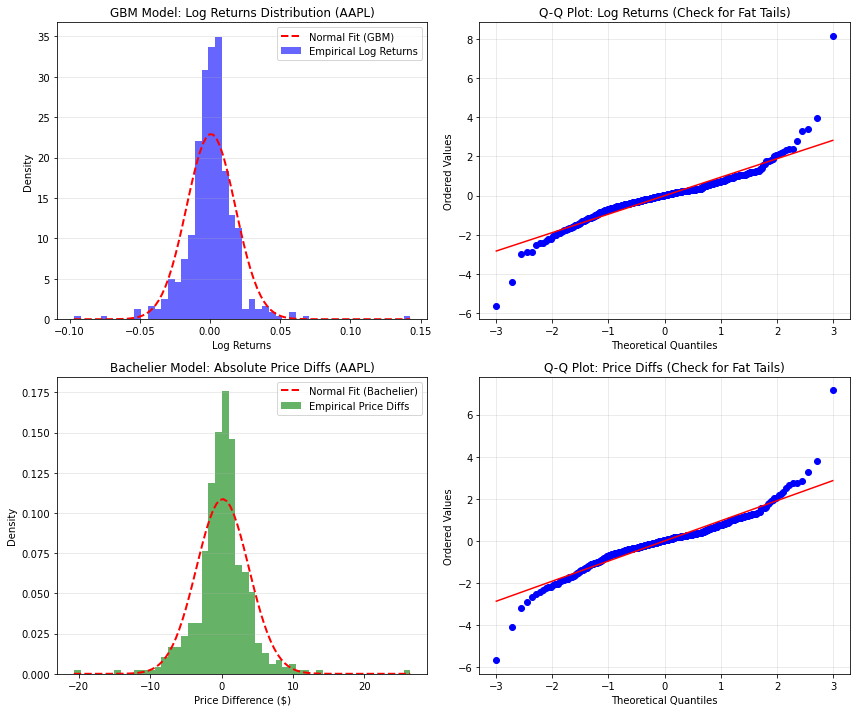

In [5]:
# --- 3. Plot Histograms, Q-Q Plot ---
# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(12, 10))

# --- GBM MODEL (LOG RETURNS) ---
# Plot 1: Histogram for Log Returns
plt.subplot(2, 2, 1)
x_vals_log = np.linspace(log_returns.min(), log_returns.max(), 100)
# Use mu and sigma calculated from log_returns
mu_l, sigma_l = stats.norm.fit(log_returns)
pdf_vals_log = stats.norm.pdf(x_vals_log, mu_l, sigma_l)

plt.hist(log_returns, bins=50, density=True, alpha=0.6, color='blue', label="Empirical Log Returns")
plt.plot(x_vals_log, pdf_vals_log, 'r--', lw=2, label='Normal Fit (GBM)')
plt.title(f"GBM Model: Log Returns Distribution ({ticker})", fontsize=12)
plt.xlabel("Log Returns", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 2: Q-Q Plot for Log Returns
plt.subplot(2, 2, 2)
log_returns_std = (log_returns - log_returns.mean()) / log_returns.std()
stats.probplot(log_returns_std, dist="norm", plot=plt)
plt.title("Q-Q Plot: Log Returns (Check for Fat Tails)", fontsize=12)
plt.xlabel("Theoretical Quantiles", fontsize=10)
plt.ylabel("Ordered Values", fontsize=10)
plt.grid(True, alpha=0.3)

# --- BACHELIER MODEL (PRICE DIFFERENCES) ---
# Plot 3: Histogram for Price Differences
plt.subplot(2, 2, 3)
x_vals_abs = np.linspace(price_diffs.min(), price_diffs.max(), 100)
# Use mu and sigma calculated from price_diffs
mu_a, sigma_a = stats.norm.fit(price_diffs)
pdf_vals_abs = stats.norm.pdf(x_vals_abs, mu_a, sigma_a)

plt.hist(price_diffs, bins=50, density=True, alpha=0.6, color='green', label="Empirical Price Diffs")
plt.plot(x_vals_abs, pdf_vals_abs, 'r--', lw=2, label='Normal Fit (Bachelier)')
plt.title(f"Bachelier Model: Absolute Price Diffs ({ticker})", fontsize=12)
plt.xlabel("Price Difference ($)", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 4: Q-Q Plot for Price Differences
plt.subplot(2, 2, 4)
price_diffs_std = (price_diffs - price_diffs.mean()) / price_diffs.std()
stats.probplot(price_diffs_std, dist="norm", plot=plt)
plt.title("Q-Q Plot: Price Diffs (Check for Fat Tails)", fontsize=12)
plt.xlabel("Theoretical Quantiles", fontsize=10)
plt.ylabel("Ordered Values", fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# --- 4. Calculate Statistics ---
def display_stats(data, label):
    s = stats.skew(data)
    k = stats.kurtosis(data)
    jb_stat, p_val = stats.jarque_bera(data)
    
    print(f"--- Statistics: {label} ---")
    print(f"Skewness:            {s:.4f}")
    print(f"Kurtosis:            {k:.4f}")
    print(f"Jarque-Bera P-value: {p_val:.4e}")
    print("-" * 40)

# Print metrics for comparison
print(f"--- Normality Test: {ticker} ---")
display_stats(log_returns, "GBM (Lognormal Fit)")
display_stats(price_diffs, "Bachelier (Normal Fit)")

--- Normality Test: AAPL ---
--- Statistics: GBM (Lognormal Fit) ---
Skewness:            0.6364
Kurtosis:            11.7107
Jarque-Bera P-value: 0.0000e+00
----------------------------------------
--- Statistics: Bachelier (Normal Fit) ---
Skewness:            0.2830
Kurtosis:            8.0102
Jarque-Bera P-value: 0.0000e+00
----------------------------------------


## Calibrattion

In [7]:
# --- 5. Calibrattion ---
def display_stats(data, label):
    # --- Financial Approach ---
    mean_annual = data.mean() * 252
    std_annual = data.std() * np.sqrt(252)
    
    # ---  MLE Approach ---
    mu, sigma = stats.norm.fit(data)
    mu_annual = mu * 252
    sigma_annual = sigma * np.sqrt(252)
    
    results = pd.DataFrame({
        'Metric': ['Annual Drift (mu)', 'Annual Volatility (sigma)'],
        'Financial': [mean_annual, std_annual],
        'MLE': [mu_annual, sigma_annual]
    })
    
    print(f"--- {label} ---")
    print(results.to_string(index=False))
    print("-" * 48)

# Print metrics for comparison
print(f"--- Calibrattion: {ticker} ---")
display_stats(log_returns, "GBM (Lognormal Fit)")
display_stats(price_diffs, "Bachelier (Normal Fit)")

--- Calibrattion: AAPL ---
--- GBM (Lognormal Fit) ---
                    Metric  Financial       MLE
         Annual Drift (mu)   0.174843  0.174843
 Annual Volatility (sigma)   0.276458  0.276182
------------------------------------------------
--- Bachelier (Normal Fit) ---
                    Metric  Financial        MLE
         Annual Drift (mu)  38.393533  38.393533
 Annual Volatility (sigma)  58.344192  58.285935
------------------------------------------------


## Predicting

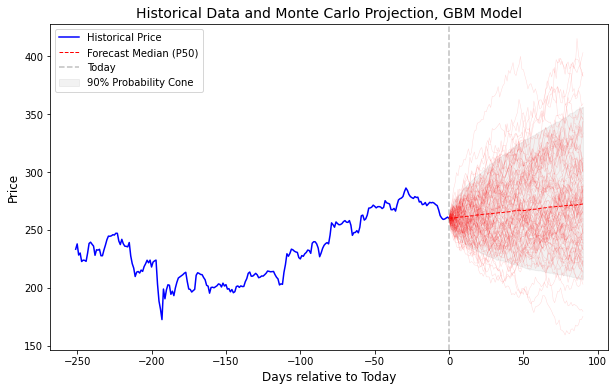

In [12]:
# --- 6 Simulation Parameters ---
S_initial = df_prices['close'].iloc[-1]
dt = 1 / 252                 # Time step (1 day)
n_steps = 90                 # 90 trading days
n_simulations = 10000        # 10000 scenarios

# Parameters from calibration section
mu, sigma = stats.norm.fit(log_returns) # MLE
mu_param = mu * 252        
sigma_param = sigma * np.sqrt(252)   

# --- 7. Projection Random Paths ---
np.random.seed(42)  # For reproducibility
dW_t = np.random.normal(loc=0, scale=np.sqrt(dt), size=(n_steps, n_simulations))

# Calculate daily growth factors using GBM discretized formula
# Formula: exp((mu - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * Z)
daily_growth = np.exp((mu_param - 0.5 * sigma_param**2) * dt + 
                       sigma_param * dW_t)

# Accumulate growth over time to get price paths
simulated_paths = S_initial * np.cumprod(daily_growth, axis=0)

# Prepend the starting price S0 to each simulation path
simulated_paths = np.vstack([np.full(n_simulations, S_initial), simulated_paths])

# --- 8. Visualization ---
plt.figure(figsize=(10, 6))

# Plot historical data
history_window = 252    #252 days of history
historical_segment = df_prices['close'].iloc[-history_window:]

history_index = np.arange(-(history_window - 1), 1) #index from -59 to 0

plt.plot(history_index, historical_segment, color='blue', lw=1.5, label='Historical Price')

# Plot simulation paths
future_index = np.arange(0, n_steps + 1) # Align projection with history

for i in range(100):
    plt.plot(future_index, simulated_paths[:, i], color='red', lw=0.5, alpha=0.15)

# Plot confidence intervals
median_path = np.percentile(simulated_paths, 50, axis=1)
p5 = np.percentile(simulated_paths, 5, axis=1)
p95 = np.percentile(simulated_paths, 95, axis=1)

plt.plot(future_index, median_path, color='red', lw=1, linestyle='--', label='Forecast Median (P50)')
plt.fill_between(future_index, p5, p95, color='grey', alpha=0.1, label='90% Probability Cone')

plt.axvline(x=0, color='grey', linestyle='--', alpha=0.5, label='Today')
plt.title(f"Historical Data and Monte Carlo Projection, GBM Model", fontsize=14)
plt.xlabel("Days relative to Today", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.show()